<a href="https://colab.research.google.com/github/abhxxy/RL/blob/main/Thompson_exp_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

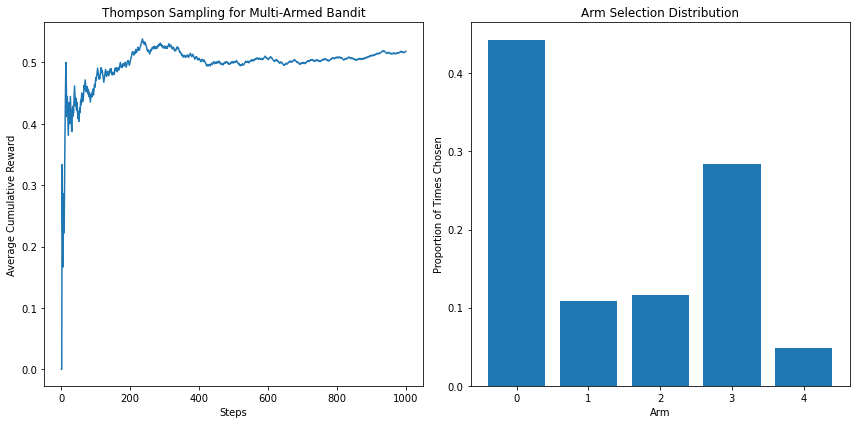

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class ThompsonSampling:
    def __init__(self, num_arms):
        self.num_arms = num_arms
        self.alpha = np.ones(num_arms)  # Initialize success counts to 1
        self.beta = np.ones(num_arms)   # Initialize failure counts to 1
        self.total_rewards = np.zeros(num_arms)
        self.num_pulls = np.zeros(num_arms)

    def pull_arm(self):
        sampled_values = np.random.beta(self.alpha, self.beta)
        return np.argmax(sampled_values)

    def update(self, chosen_arm, reward):
        self.num_pulls[chosen_arm] += 1
        self.total_rewards[chosen_arm] += reward

        if reward == 1:
            self.alpha[chosen_arm] += 1
        else:
            self.beta[chosen_arm] += 1

def simulate_thompson_sampling(num_arms, num_steps):
    bandit = ThompsonSampling(num_arms)
    rewards = []

    for _ in range(num_steps):
        chosen_arm = bandit.pull_arm()

        # Simulate reward (1 for success, 0 for failure)
        # You can replace this with your own reward function
        reward = np.random.choice([0, 1])

        bandit.update(chosen_arm, reward)
        rewards.append(reward)

    return rewards, bandit.num_pulls, bandit.total_rewards

def main():
    num_arms = 5  # You can change the number of arms
    num_steps = 1000  # You can change the number of steps

    rewards, num_pulls, total_rewards = simulate_thompson_sampling(num_arms, num_steps)

    # Plot cumulative rewards over time
    cumulative_rewards = np.cumsum(rewards)
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(np.arange(1, num_steps + 1), cumulative_rewards / np.arange(1, num_steps + 1))
    plt.xlabel('Steps')
    plt.ylabel('Average Cumulative Reward')
    plt.title('Thompson Sampling for Multi-Armed Bandit')

    # Plot proportion of times each arm was chosen
    plt.subplot(1, 2, 2)
    plt.bar(np.arange(num_arms), num_pulls / np.sum(num_pulls))
    plt.xlabel('Arm')
    plt.ylabel('Proportion of Times Chosen')
    plt.title('Arm Selection Distribution')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()
